<a href="https://colab.research.google.com/github/haleywis/OPTI556/blob/main/HW3_Wiskoski_Part1and2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OPTI-556: Computational Imaging**  
# Haley Wiskoski  
Homework #3 - Rays   
Due: Thursday October 7, 2021
Part 1 & 2: MURA Coded Aperture Imaging and Neural Denoising

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from PIL import Image
from keras.datasets import mnist
from progressbar import ProgressBar

## 1) MURA Coded Aperture Imaging

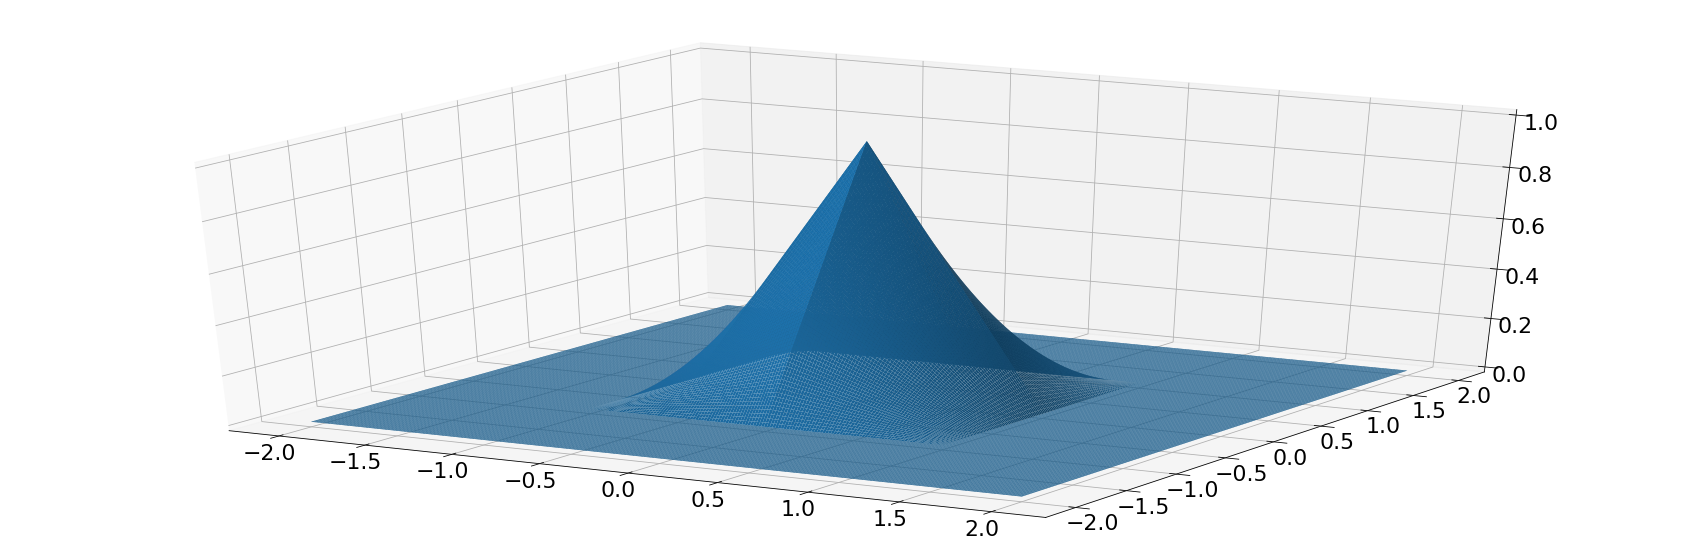

In [ ]:
# Creatining the coded aperture sampling function
pixel = np.zeros((128,128))
pixel[(64-32):(64+32),(64-32):(64+32)] = 1
sampFun = signal.convolve2d(pixel,pixel)
sampFun = sampFun/np.max(sampFun)

fig=plt.figure()
ax = plt.gca(projection='3d')
X, Y = np.meshgrid(np.linspace(-2,2,255), np.linspace(-2,2,255))
surf = ax.plot_surface(X, Y, sampFun, rstride=1, cstride=1, antialiased=True, linewidth=0)

In [ ]:
# Quadratic Residues Function
def qres(p):
  # function to find the quadratic residues modulo prime number p between 1
  # and p-1. The function returns a list with value 1 for all indices which
  # are quadratic residues modulo p and value 0 for indices which are not
  # quadratic residues.
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr

Text(0.5, 0.92, 'Cross Corelation with Decoding Pattern')

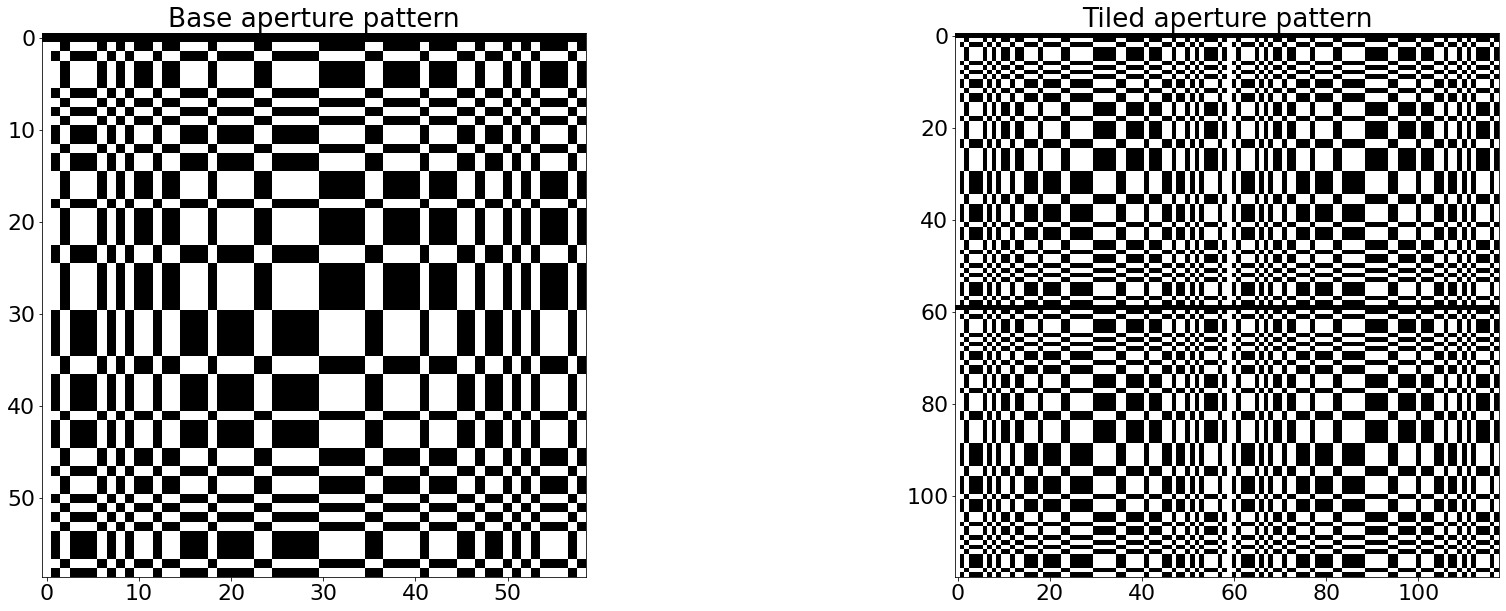

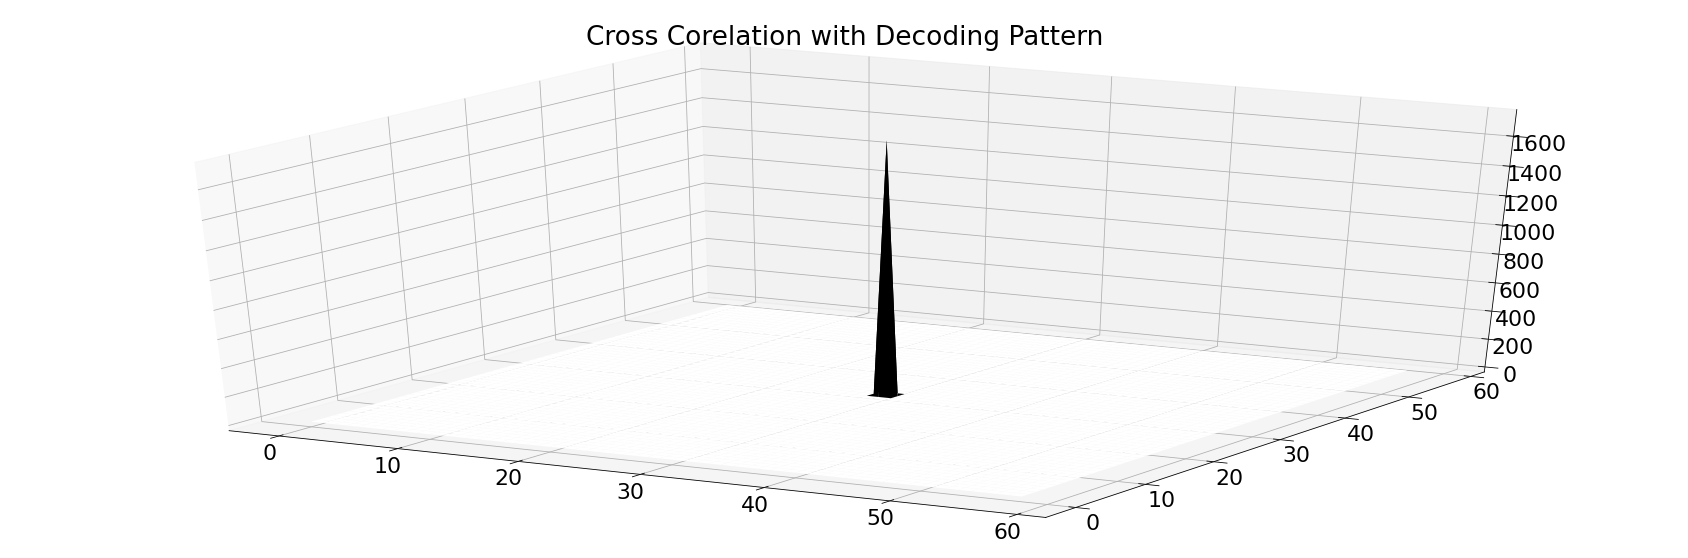

In [ ]:
# Creating our 59x59 element MURA Coding Mask
p=59
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;
cp=signal.convolve2d(ht,t, mode='same',boundary='wrap');

# Plotting Aperture Pattern
plt.subplot(1,2,1)
plt.imshow(t,cmap='gray');
plt.title('Base aperture pattern')
plt.subplot(1,2,2);
plt.imshow(tt, cmap='gray');
plt.title('Tiled aperture pattern')

# Plotting the cross-correlation with the decoding pattern
fig=plt.figure()
ax = plt.gca(projection='3d')
X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))
surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')
plt.title('Cross Corelation with Decoding Pattern')

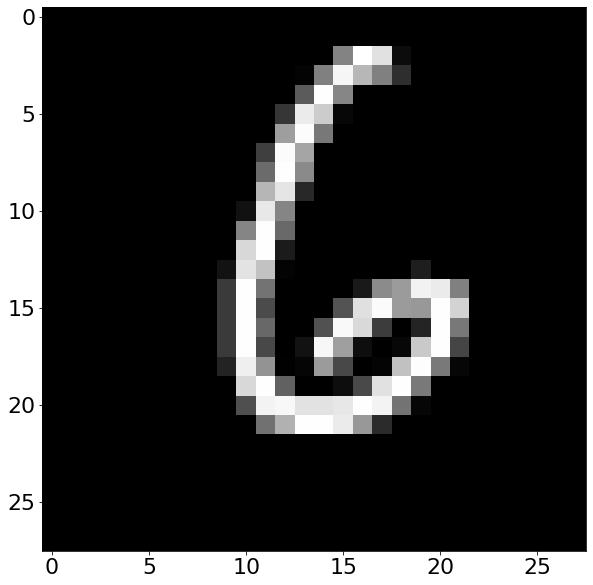

In [ ]:
# Loading mnist dataset of characters to use as test images for reconstruction
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
plt.imshow(x_train[32],cmap='gray')

### A) Reconstruction (no noise)

(-0.5, 58.5, 58.5, -0.5)

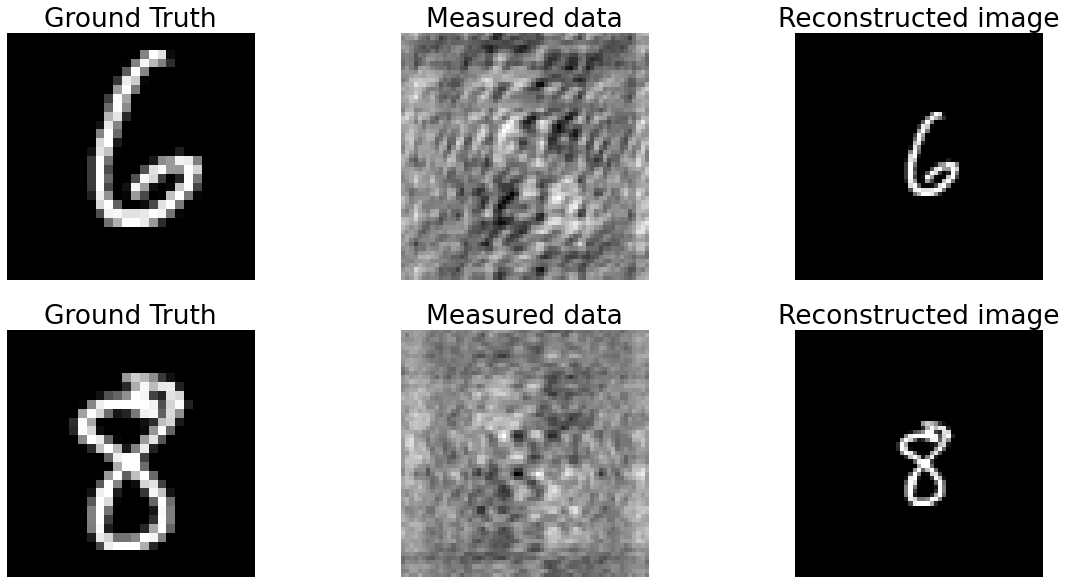

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

# Step 1 generate projected pattern
imagey = x_train[32];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

# Doing the above process again on a second image 
imagey = x_train[46];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

### B) Reconstruction (100 photons per pixel)




(-0.5, 58.5, 58.5, -0.5)

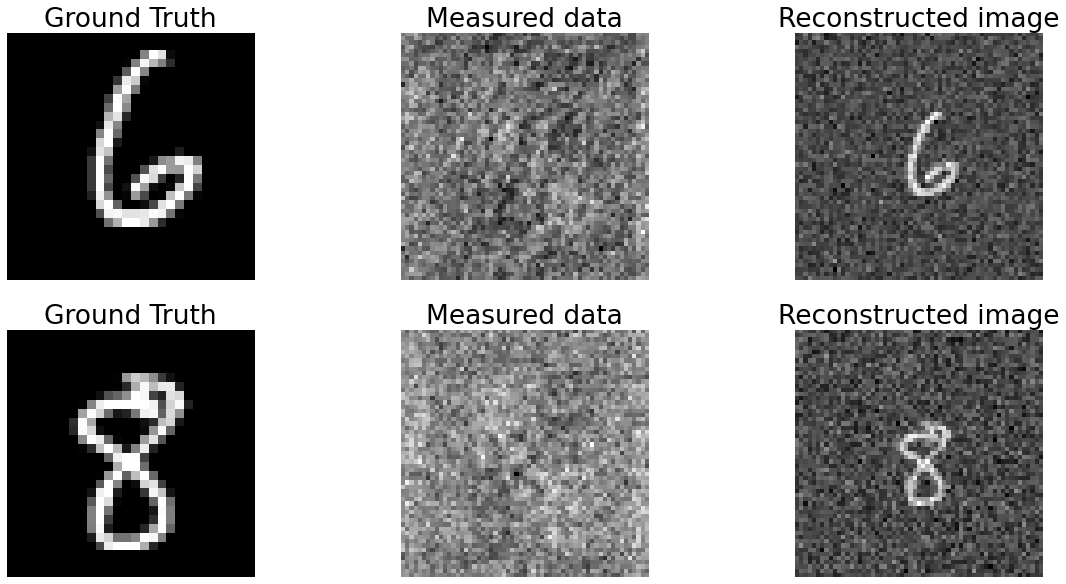

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

# Step 1 generate projected pattern
imagey = x_train[32];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

# Doing the above process again on a second image 
imagey = x_train[46];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

### C) Reconstruction (10 photons per pixel)

(-0.5, 58.5, 58.5, -0.5)

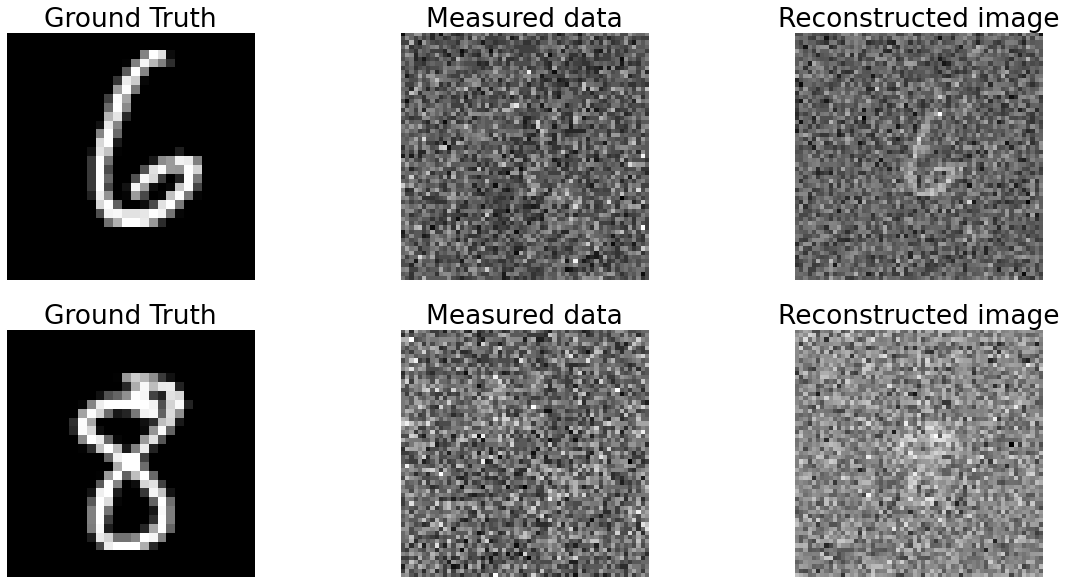

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

# Step 1 generate projected pattern
imagey = x_train[32];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=10
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

# Doing the above process again on a second image 
imagey = x_train[46];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=10
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

### D) Discussion

## 2) Neural Denoising of Reconstructed Images

In [2]:
# load the mnist dataset of characters
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train =np.pad(x_train, ((0,0),(14,14),(14,14)), 'constant')
x_test =np.pad(x_test, ((0,0),(14,14),(14,14)), 'constant')
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

print(np.shape(x_test))


11501568/11490434 [==============================] - 0s 0us/step
(10000, 56, 56)


In [3]:
# Load previous test data to save time
x_train1 = np.load('/content/drive/MyDrive/University of Arizona/x_train1.npy')
x_test1 = np.load('/content/drive/MyDrive/University of Arizona/x_test1.npy')

In [4]:
# Here we're checking if the loaded data is the same as the data 
# we gathered from mnist above

# if the loaded dad from a previous session is still viable we'll load
# the rest 
if (x_train1.shape[0:3] == x_train.shape) and (x_test1.shape[0:3] == x_test.shape):
  print('Loading data from prior session...')
  g_train1 = np.load('/content/drive/MyDrive/University of Arizona/g_train1.npy')
  g_test1 = np.load('/content/drive/MyDrive/University of Arizona/g_test1.npy')
  print('Data loaded successfully')

# if not, we will recreate the g_test and g_train data and save the new data
else:   
  g_test=np.zeros(np.shape(x_test))
  g_train=np.zeros(np.shape(x_train))

  pbar1 = ProgressBar()
  for pop in pbar1(range(np.shape(x_test)[0])):
    g_test[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_test[pop,:,:], mode='same',boundary='wrap'))\
                                                ,mode='same',boundary='wrap'),dsize=(56,56))
    g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])

  pbar2 = ProgressBar()
  for pop in pbar2(range(np.shape(x_train)[0])):
    g_train[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_train[pop,:,:], mode='same',boundary='wrap'))\
                                                  ,mode='same',boundary='wrap'),dsize=(56,56))
    g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])

  x_train = np.reshape(x_train, (len(x_train), 56,56, 1))
  x_test = np.reshape(x_test, (len(x_test), 56,56, 1))
  g_train = np.reshape(g_train, (len(g_train), 56,56, 1))
  g_test = np.reshape(g_test, (len(g_test), 56,56, 1))

  np.save('x_train1', x_train)
  np.save('x_test1', x_test)
  np.save('g_train1', g_train)
  np.save('g_test1', g_test)

Loading data from prior session...
Data loaded successfully


1.0


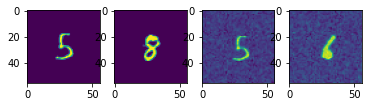

In [29]:
if (x_train1.shape[0:3] == x_train.shape) and (x_test1.shape[0:3] == x_test.shape):
  x_train = x_train1
  x_test = x_test1
  g_train = g_train1
  g_test = g_test1

plt.subplot(1,4,1)
plt.imshow(x_test[1931].reshape(56,56))
plt.subplot(1,4,2)
plt.imshow(x_train[1931].reshape(56,56))
plt.subplot(1,4,3)
plt.imshow(g_test[1931].reshape(56,56))
plt.subplot(1,4,4)
plt.imshow(g_train[1931].reshape(56,56))
print(np.max(g_test[1931]))

### A) Denoising Model #1

#### Layers

In [30]:
input_img = keras.Input(shape=(56, 56, 1))
# we add in four extra layers on top of Dr. Brady's example, now 14 epochs

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 56, 56, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0     

#### Training

In [31]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=14,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/14
469/469 [==============================] - 25s 17ms/step - loss: 0.0620 - val_loss: 0.0323
Epoch 2/14
469/469 [==============================] - 7s 16ms/step - loss: 0.0295 - val_loss: 0.0269
Epoch 3/14
469/469 [==============================] - 7s 15ms/step - loss: 0.0260 - val_loss: 0.0251
Epoch 4/14
469/469 [==============================] - 7s 16ms/step - loss: 0.0244 - val_loss: 0.0242
Epoch 5/14
469/469 [==============================] - 7s 15ms/step - loss: 0.0234 - val_loss: 0.0227
Epoch 6/14
469/469 [==============================] - 7s 15ms/step - loss: 0.0226 - val_loss: 0.0221
Epoch 7/14
469/469 [==============================] - 7s 15ms/step - loss: 0.0221 - val_loss: 0.0216
Epoch 8/14
469/469 [==============================] - 7s 16ms/step - loss: 0.0217 - val_loss: 0.0212
Epoch 9/14
469/469 [==============================] - 7s 15ms/step - loss: 0.0214 - val_loss: 0.0210
Epoch 10/14
469/469 [==============================] - 7s 15ms/step - loss: 0.0211 - val_l

#### Results

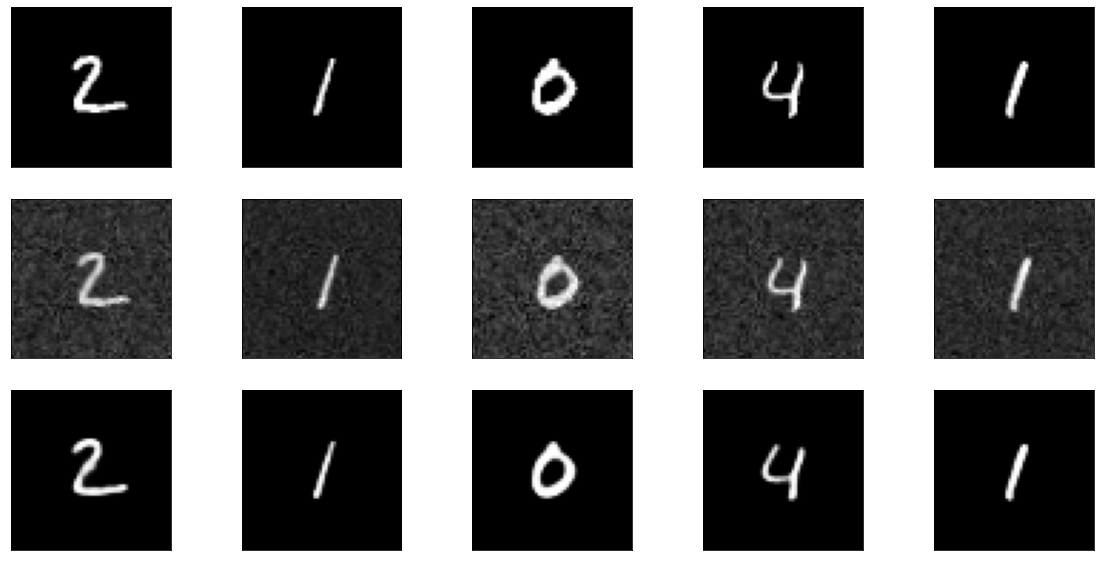

In [32]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### B) Denoising Model #2

#### Layers

#### Training

#### Results

### C) Discussion